# Importing Required Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set(style="whitegrid")

# Loading and Inspecting The Datasets

In [2]:
df1 = pd.read_csv("Unemployment in India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [4]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
df1.info()
df2.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    str    
 1    Date                                     740 non-null    str    
 2    Frequency                                740 non-null    str    
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    str    
dtypes: float64(3), str(4)
memory usage: 42.1 KB
<class 'pandas.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------

In [9]:
df1.describe()
df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


# Data Cleaning and Preprocessing

In [12]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

df1["Date"] = pd.to_datetime(df1["Date"], dayfirst=True)
df2["Date"] = pd.to_datetime(df2["Date"], dayfirst=True)

df1.dropna(inplace=True)
df2.dropna(inplace=True)

# EDA - Exploratory Data Analysis 

1. Unemployment Trend Over Time

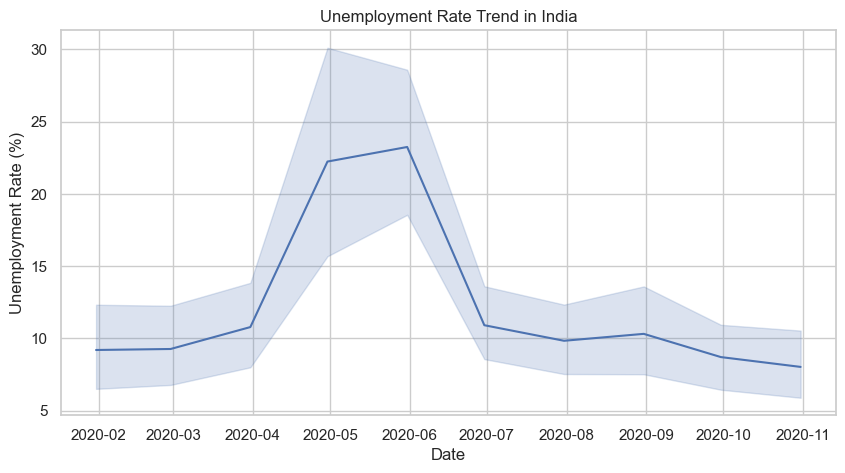

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Estimated Unemployment Rate (%)", data=df2)
plt.title("Unemployment Rate Trend in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

2. Covid-19 Impact Analysis

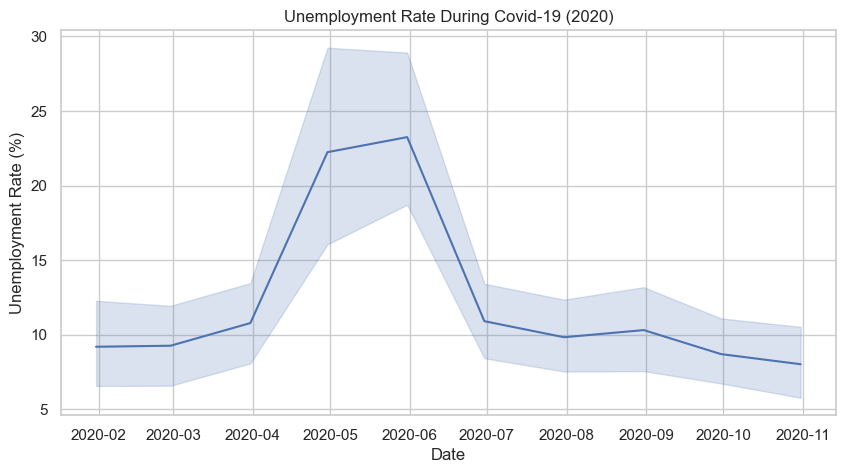

In [16]:
covid_df = df2[df2["Date"].dt.year == 2020]

plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Estimated Unemployment Rate (%)", data=covid_df)
plt.title("Unemployment Rate During Covid-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

3. Region-Wise Unemployment Analysis

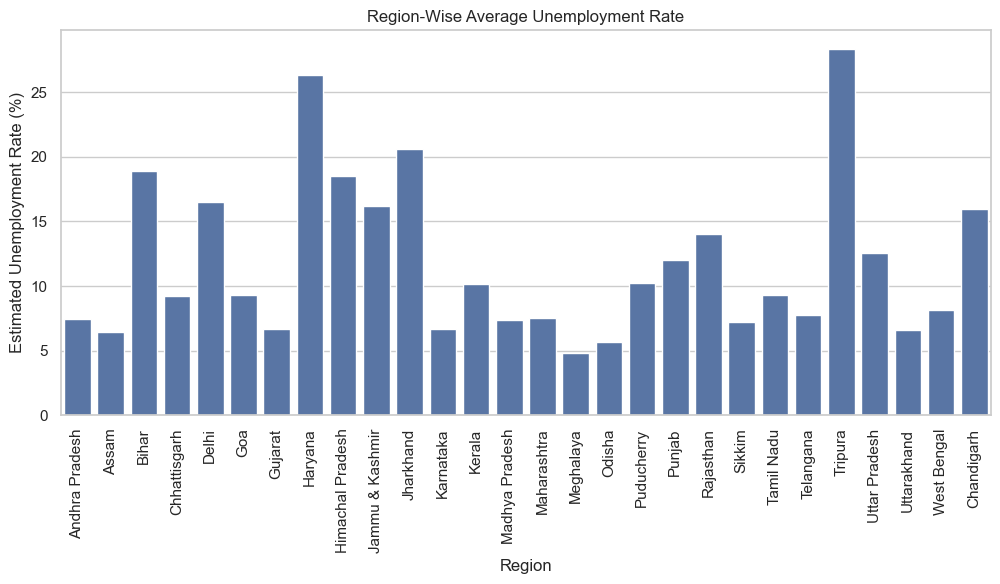

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df1, errorbar=None)
plt.xticks(rotation=90)
plt.title("Region-Wise Average Unemployment Rate")
plt.show()

4. Urban vs Rural Unemployment Comparison

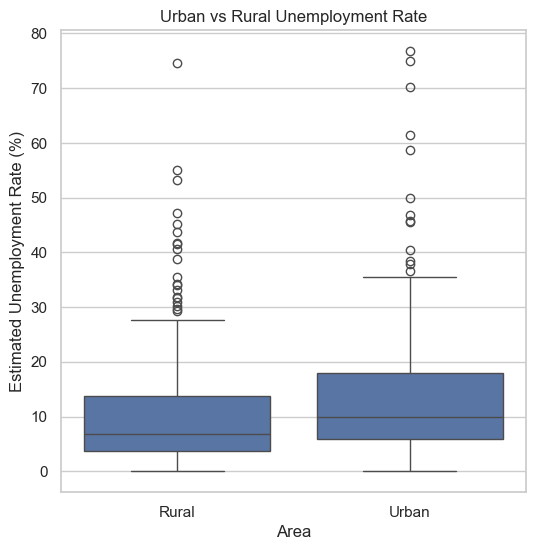

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x="Area", y="Estimated Unemployment Rate (%)", data=df1)
plt.title("Urban vs Rural Unemployment Rate")
plt.show()

5. Labour Participation Rate Analysis

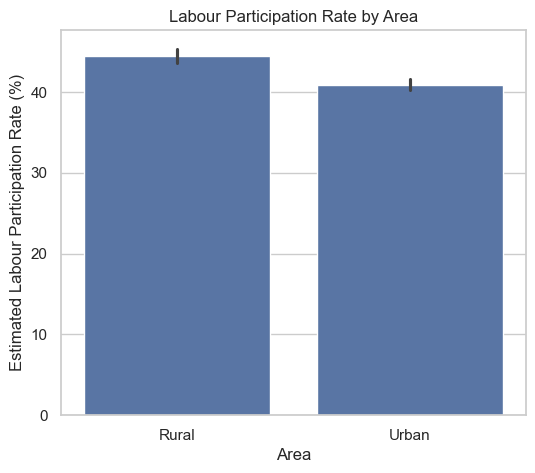

In [23]:
plt.figure(figsize=(6,5))
sns.barplot(x="Area", y="Estimated Labour Participation Rate (%)", data=df1)
plt.title("Labour Participation Rate by Area")
plt.show()

6. Correlation Analysis

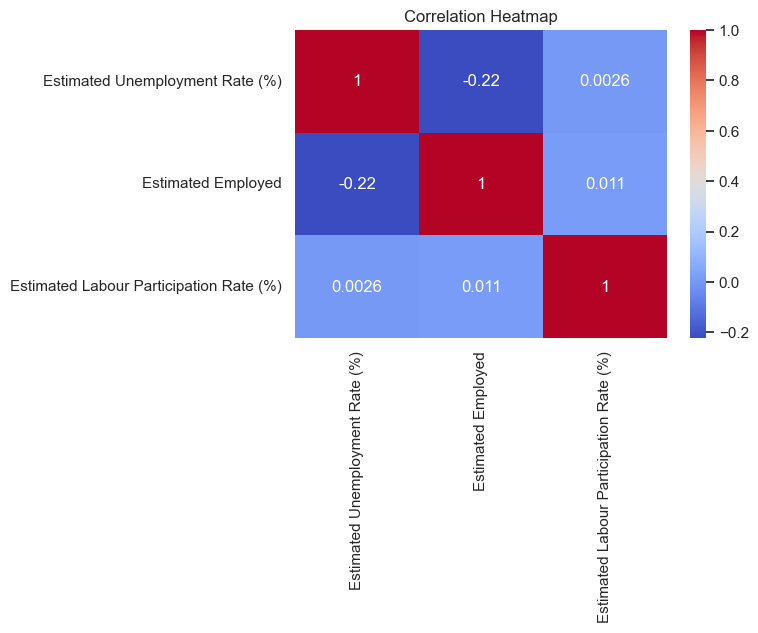

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ML Based Prediction and forecasting 

In [26]:
df1['Date_ordinal'] = df1['Date'].map(pd.Timestamp.toordinal)

X1 = df1[['Date_ordinal']]
y1 = df1['Estimated Unemployment Rate (%)']

In [28]:
le = LabelEncoder()
df2['Region_encoded'] = le.fit_transform(df2['Region'])

df2['Date_ordinal'] = df2['Date'].map(pd.Timestamp.toordinal)

X2 = df2[['Date_ordinal', 'Region_encoded']]
y2 = df2['Estimated Unemployment Rate (%)']

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
prediction1 = model1.predict(X1_test)
print("MAE (Dataset 1):", mean_absolute_error(y1_test, prediction1)*10)

prediction2 = model2.predict(X2_test)
print("MAE (Dataset 2):", mean_absolute_error(y2_test, prediction2)*10)

MAE (Dataset 1): 77.419224957681
MAE (Dataset 2): 78.63033928762901


In [36]:
last_date1 = df1['Date'].max()
future_dates1 = pd.date_range(start=last_date1, periods=7, freq='ME')[1:]

future_df1 = pd.DataFrame({'Date': future_dates1})
future_df1['Date_ordinal'] = future_df1['Date'].map(pd.Timestamp.toordinal)

future_df1['Predicted Unemployment Rate (%)'] = model1.predict(future_df1[['Date_ordinal']])

In [38]:
last_date2 = df2['Date'].max()
future_dates2 = pd.date_range(start=last_date2, periods=7, freq='ME')[1:]

future_list = []

for region in df2['Region'].unique():
    region_code = le.transform([region])[0]
    for date in future_dates2:
        future_list.append([date, date.toordinal(), region, region_code])

future_df2 = pd.DataFrame(future_list,columns=['Date', 'Date_ordinal', 'Region', 'Region_encoded'])

future_df2['Predicted Unemployment Rate (%)'] = model2.predict(future_df2[['Date_ordinal', 'Region_encoded']])

# Vizualizing Prediction

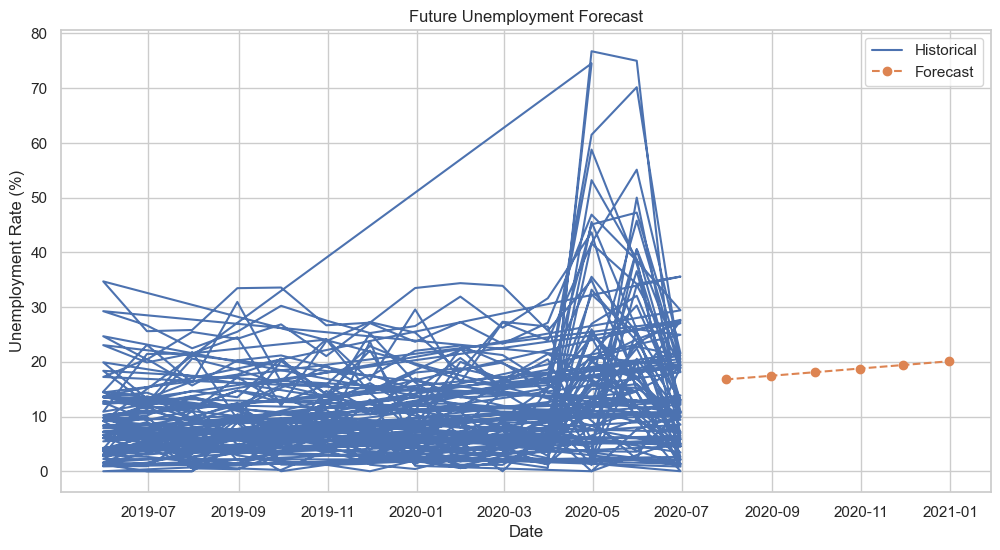

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df1['Date'], df1['Estimated Unemployment Rate (%)'], label='Historical')
plt.plot(future_df1['Date'], future_df1['Predicted Unemployment Rate (%)'],
         linestyle='--', marker='o', label='Forecast')
plt.title("Future Unemployment Forecast")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

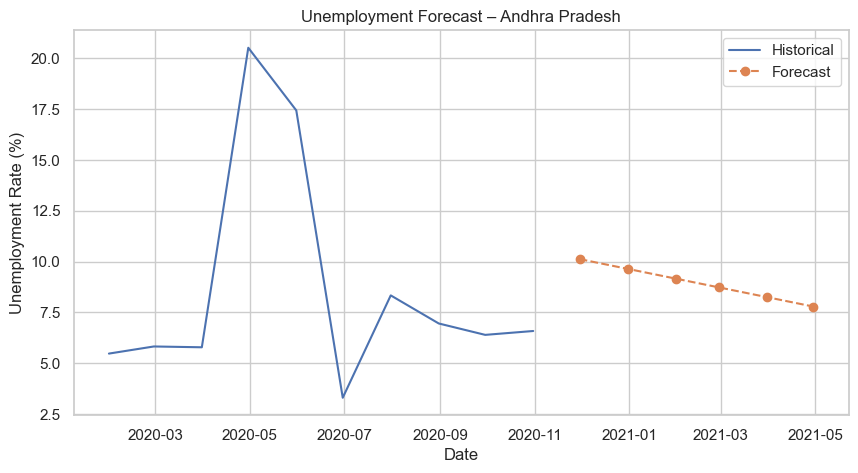

In [44]:
sample_region = df2['Region'].unique()[0]

region_hist = df2[df2['Region'] == sample_region]
region_future = future_df2[future_df2['Region'] == sample_region]

plt.figure(figsize=(10,5))
plt.plot(region_hist['Date'],
         region_hist['Estimated Unemployment Rate (%)'],
         label='Historical')

plt.plot(region_future['Date'],
         region_future['Predicted Unemployment Rate (%)'],
         linestyle='--', marker='o',
         label='Forecast')

plt.title(f"Unemployment Forecast – {sample_region}")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()